In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../')
from utilities.plot_results import plot_prediction


In [126]:
cs_file = '../data/SMB_input_belli_ERA5.csv'

df_test = pd.read_csv(cs_file, delimiter='\t', index_col=['Date'], parse_dates=['Date'], na_values='NAN')

df_test

,Stake,Latitude,Longitude,Elevation,Days,SMB,t2m,sf,PDD
Date,,,,,,,,,
2008-01-26,R15,-62.178873,-58.907921,54.0,21,-0.23003,0.669618,0.018224,15.887604
2008-02-02,R15,-62.178873,-58.907921,54.0,7,-0.02890,1.335468,0.000028,10.683746
2008-02-09,R15,-62.178873,-58.907921,54.0,7,-0.04356,0.495777,0.009557,4.213654
2008-02-17,R15,-62.178873,-58.907921,54.0,8,-0.20554,1.629045,0.000120,14.661407
2008-02-24,R15,-62.178873,-58.907921,54.0,7,-0.11200,1.876850,0.001954,15.014801
...,...,...,...,...,...,...,...,...,...
2012-02-04,9N,-62.166223,-58.883543,261.0,15,-0.07890,-1.191734,0.007514,0.085175
2012-02-19,9N,-62.166223,-58.883543,261.0,15,-0.08170,-1.147125,0.012092,1.320099
2012-03-04,9N,-62.166223,-58.883543,261.0,14,0.09720,-2.062679,0.004308,0.260529


In [127]:
df_test['Year'] =df_test.index.year

In [128]:
labels = df_test.drop_duplicates(subset=['Stake'])
label_year = df_test.drop_duplicates(subset=['Year']).sort_values(by=['Year'])['Year'].values

In [129]:
smb_sea = []
for j in labels['Stake'][0:]:
    stake = df_test.loc[lambda df: df['Stake'] == j, :]    
    for i in label_year[:-1]:
        time1_w = str(i)+'1001'
        time2_w = str(i+1)+'0331'
        smb_sea.append(stake[time1_w:time2_w])

In [130]:
smb_sea_t = pd.concat(smb_sea)
smb_sea_t.reset_index(drop=True, inplace=True)

In [131]:
#smb_sea_t['PDD'] = smb_sea_t['PDD']/(smb_sea_t['Days'])
#smb_sea_t['SMB'] = smb_sea_t['SMB']/(smb_sea_t['Days'])

In [132]:
smb_sea_t = smb_sea_t[['PDD', 'SMB']].where(smb_sea_t['SMB'] <= 0, np.nan).where(smb_sea_t['SMB'] > -0.4, np.nan).where(smb_sea_t['Elevation'] < 200, np.nan).dropna()
print(smb_sea_t.head())
print(len(smb_sea_t))
print(smb_sea_t.corr())

         PDD      SMB
0  15.887604 -0.23003
1  10.683746 -0.02890
2   4.213654 -0.04356
3  14.661407 -0.20554
4  15.014801 -0.11200
825
          PDD       SMB
PDD  1.000000 -0.691643
SMB -0.691643  1.000000


In [133]:
smb_sea_t

,PDD,SMB
0,15.887604,-0.23003
1,10.683746,-0.02890
2,4.213654,-0.04356
3,14.661407,-0.20554
4,15.014801,-0.11200
...,...,...
1110,0.995453,-0.03500
1111,4.242706,-0.03630
1112,2.286743,-0.09630
1113,5.154205,-0.18860


In [134]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [135]:
y1 = smb_sea_t['PDD'].values
y2 = smb_sea_t['SMB'].values
reg = LinearRegression().fit(y1.reshape(-1, 1),y2)
print(reg)
x_int = np.arange(-5,35,0.5)
print(x_int)

LinearRegression()
[-5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5
  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.   7.5  8.   8.5
  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5 14.  14.5 15.  15.5
 16.  16.5 17.  17.5 18.  18.5 19.  19.5 20.  20.5 21.  21.5 22.  22.5
 23.  23.5 24.  24.5 25.  25.5 26.  26.5 27.  27.5 28.  28.5 29.  29.5
 30.  30.5 31.  31.5 32.  32.5 33.  33.5 34.  34.5]


In [146]:
textstr = '\n'.join((
r'$R^2=%.2f$' % (r2_score(y1, y2), ),
r'$MF=%.3f$' % (reg.intercept_)+' '+'m PDD$^{-1}$', ))
print(textstr)

$R^2=-0.95$
$MF=-0.054$ m PDD$^{-1}$


-0.05419102705703541


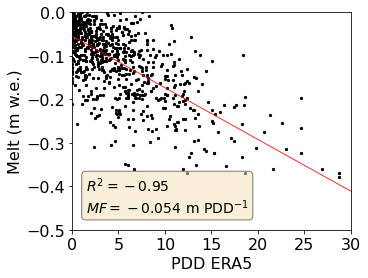

In [154]:
fig = plt.figure(figsize=(5,4))
plt.scatter(smb_sea_t['PDD'], smb_sea_t['SMB'], s=5, color='k')
plt.plot(x_int, reg.intercept_ + reg.coef_ * x_int, linewidth=0.8, color='r', linestyle ='-')
plt.ylabel('Melt (m w.e.)', fontsize=16)
plt.xlabel('PDD ERA5', fontsize=16)
plt.xlim(0, 30)
plt.ylim(-0.5, 0)
plt.xticks(np.arange(0,35,5), fontsize=16)
plt.yticks(np.arange(-0.5,0.1,0.1), fontsize=16)

# Vamos agregar un caja para que se muestre los indicadores estadísticos. Aquí configuramos los propiedades de la caja
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# Ahora podemos agregar nuestros indicadores estadísticos
plt.text(0.05, 0.25, textstr, transform=plt.gca().transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
print(reg.intercept_)

# Finalmente guardamos nuestra figura
fig.savefig('../fig/Cal_2007-2012.png', dpi = 200, facecolor='w', bbox_inches = 'tight', 
            pad_inches = 0.1)
